In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import numpy as np
from matplotlib import colormaps
import torchvision
import os

import utils
from datasets import CocoLoader,get_coco_split

In [2]:
# CUDA tests
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # might not be viable, check again!

print("CUDA available:" + str(torch.cuda.is_available()))
from torch.utils.cpp_extension import CUDA_HOME

print("CUDA_HOME:" + str(CUDA_HOME))
torch.device("cuda" if torch.cuda.is_available() else "cpu")

available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
print(available_gpus)
print(torch.cuda.device_count())

CUDA available:True
CUDA_HOME:/home.stud/svobo114/.conda/envs/detect_env_clone
1


# COCO testing

In [3]:
transforms = None
data_train = CocoLoader(get_coco_split(split="val"), transform=transforms)

No root provided, using default
loading annotations into memory...
Done (t=0.97s)
creating index...
index created!


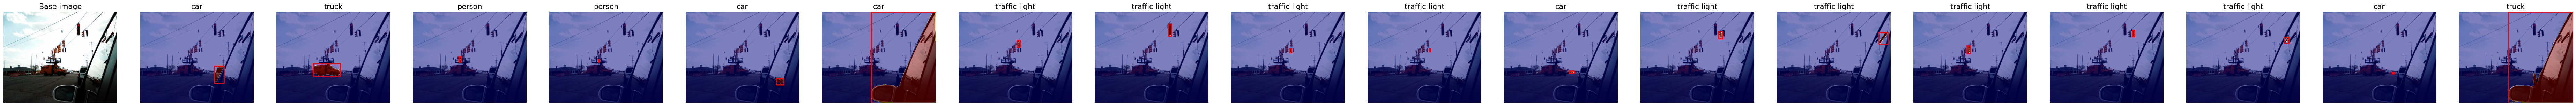

tensor([216,   0, 500, 400], dtype=torch.int32)
tensor([216,   0, 500, 400], dtype=torch.int32)


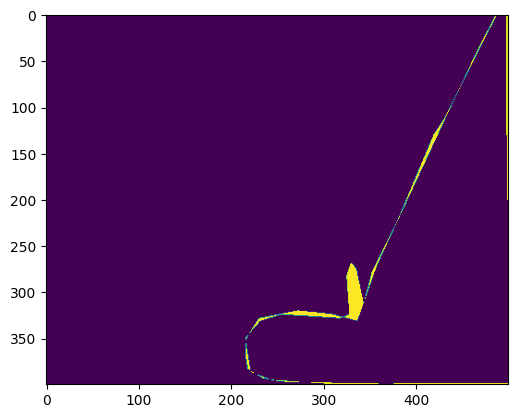

In [12]:
# what to take
to_show = 1
offset = 1593

# for visuals
scale = 5
linewidth = 2

items = data_train.get_amount(to_show, offset)

for item in items:
    utils.grid_masks_boxes(
        item["image"],
        item["annotations"]["masks"],
        item["annotations"]["boxes"],
        # Use the API to translate the category IDs to names
        titles=data_train.catIDs_to_names(item["annotations"]["categories"]),
        scale=scale,
        linewidth=2,
    )
    print(item["annotations"]["boxes"][5])
    print(item["annotations"]["boxes"][17])
    plt.imshow(item["annotations"]["masks"][5] != item["annotations"]["masks"][17]) 
    

In [ ]:
images_to_show = 2
offset = 2

scale = 5
linewidth = 2

items = data_train.get_amount(to_show, offset)
for item in items:
    utils.print_masks_boxes(
        item["image"],
        item["annotations"]["masks"],
        item["annotations"]["boxes"],
        linewidth=linewidth,
        scale=scale,
        opacity=0.8,
        mask_background=False,
    )

### Testing crop function

In [ ]:
# all crops work? on PIL Image and numpy array
idx_image = 10
idx_mask = 0
test_item = data_train[idx_image]
image = test_item["image"]
mask = test_item["annotations"]["masks"][idx_mask]
box = test_item["annotations"]["boxes"][idx_mask]

utils.print_masks_boxes(image, [mask], [box], linewidth=1, scale=8)

cropped_img, cropped_mask, cropped_box = utils.crop_xyxy(
    image, mask, box, crop_box=box  # use the gt bbox as crop box, can be any
)
utils.print_masks_boxes(cropped_img, [cropped_mask], [cropped_box])
